# Hierarchical Clustering

The parameters in hierarchical clustering (linkage):
- `method`: how to calculate the proximity of clusters eg 'single'
- `metric`: distance metric eg 'euclidean'

### The "`method`" argument
- `single`: decides the proximity of clusters based on their two closest objects.
- `complete`: decides the proximity of cluster centers based on their two farthest objects.
- `avergae`: based on the arithemtic mean of all objects
- `centroid`: based on the geometric mean of all objects
- `median`: based on the median of all objects
- `ward`: based on sum of squares

Cluster labels with fcluster:
- output of `linkage()` method
- `num_clusters`:number of clusters
- `criterion`:how to decide thresholds to form clusters

In [1]:
import pandas as pd
comic_com = pd.DataFrame({'x_coordinate':[17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87, 83, 90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27, 17, 17],
                         'y_coordinate':[4, 6, 0, 0, 4, 3, 1, 6, 5, 4, 6, 10, 8, 10, 97, 94, 99, 95, 95, 97, 99, 99, 94, 99, 90, 98, 100, 93, 98, 15, 10, 0, 10, 7, 17, 15],
                         })

In [2]:
from scipy.cluster.vq import whiten
comic_com['x_scaled'] = whiten(comic_com['x_coordinate'])
comic_com['y_scaled'] = whiten(comic_com['y_coordinate'])

In [3]:
comic_com.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000
3,14,0,0.419464,0.000000
4,37,4,1.108583,0.090010


## Hierarchical clustering: ward method

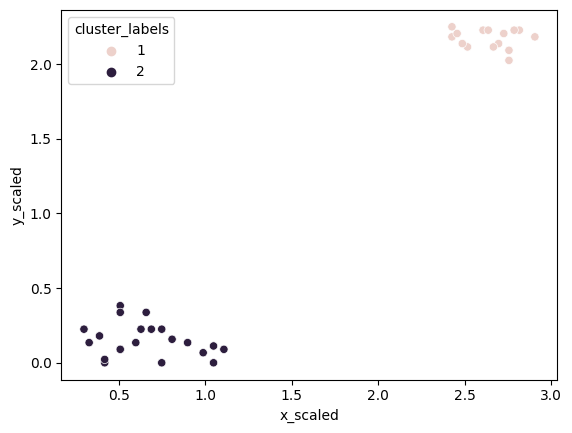

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_com[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_com['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_com)
plt.show()

## Hierarchical clustering: single method

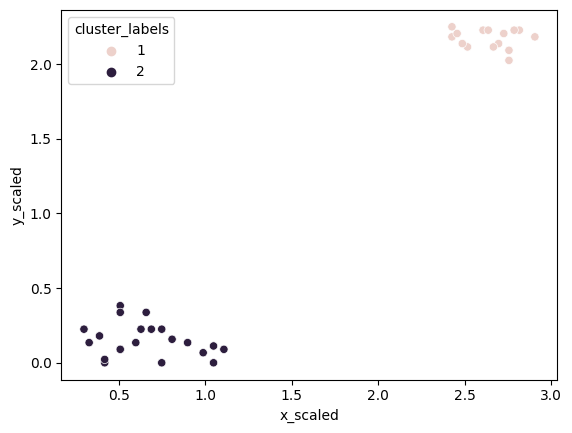

In [10]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_com[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_com['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_com)
plt.show()

## Hierarchical clustering: complete method

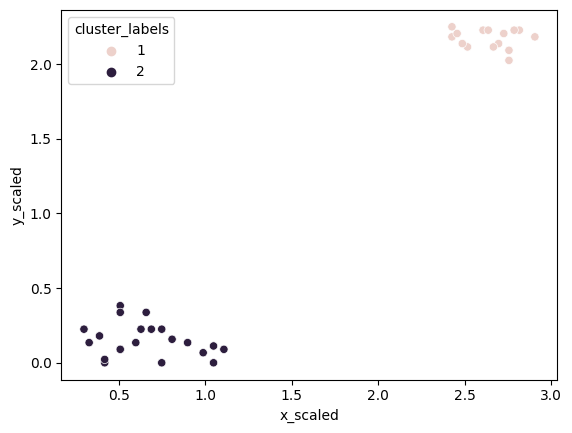

In [11]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_com[['x_scaled', 'y_scaled']], method = 'complete', metric = 'euclidean')

# Assign cluster labels
comic_com['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_com)
plt.show()

# Visualize clusters

In [12]:
comic_com['cluster_labels'] = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2]
comic_com.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled,cluster_labels
0,17,4,0.509349,0.090010,2
1,20,6,0.599234,0.135015,2
2,35,0,1.048660,0.000000,2
3,14,0,0.419464,0.000000,2
4,37,4,1.108583,0.090010,2


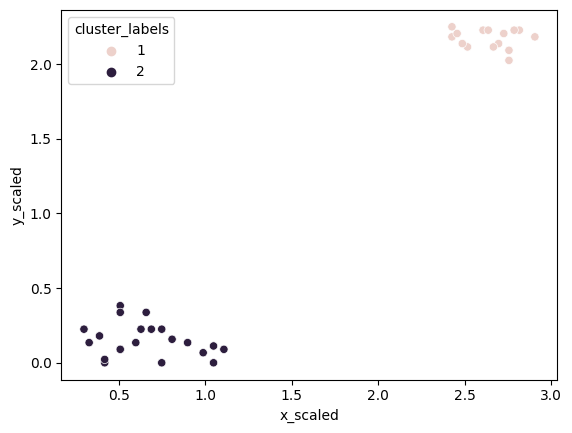

In [14]:
# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data = comic_com)
plt.show()

## Dendrogram

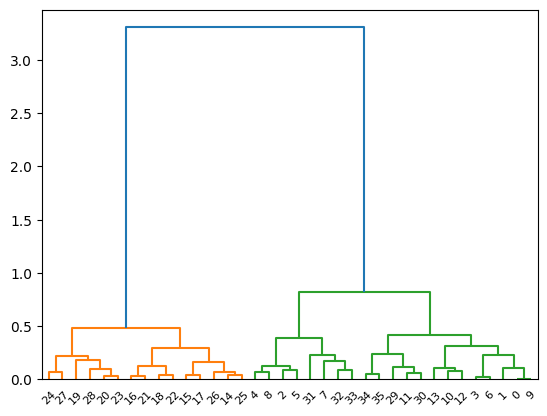

In [15]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

# FIFA 18: exploring defenders

In [17]:
fifa = pd.read_csv('datasets/fifa_18_dataset.csv')
fifa.shape

(17994, 2)

In [19]:
fifa.columns

Index(['sliding_tackle', 'aggression'], dtype='object')

In [20]:
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])
fifa.columns

Index(['sliding_tackle', 'aggression', 'scaled_sliding_tackle',
       'scaled_aggression'],
      dtype='object')

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            0.987373           1.849142
2                            3.013487           4.063492
3                            1.934455           3.210802


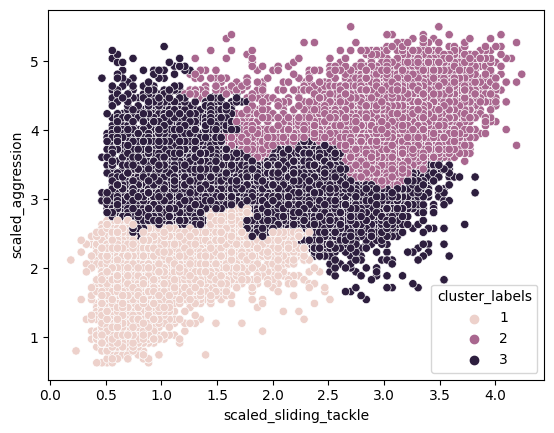

In [21]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()